# Lecture 2. <br> Metric methods for classification and regression. Metric learning

## Previous lecture

- Basic definitions
- Problem statements: classification, regression, clustering and others
- Overfitting and generalization ability
- Examples of real cases to use machine learning

## Today lecture

- k-Nearest Neighbours method
- Metric learning

## Assumptions

- Compactness hypothesis for classification
- Continuous hypothesis for regression

## General form for metric algorithm

- Given set of samples and lables $(x_1, y_1), \dots, (x_n, y_n) \subset X \times Y$
- For new sample $x \in X$ sort given samples:
$$
\rho(x, x^{(1)}) \leq \dots \leq \rho(x, x^{(n)})
$$
- Learning algorithm
$$
y = \arg\max_{y \in Y} \sum_{i=1}^n w(i, x)[y \neq y^{(i)}]
$$
    - $w(x, i)$ &mdash; importance rate of the $i$-th neighbor w.r.t the sample $x$

## k-Nearest Neighbors algorithm

- $w(i, x) = [i == 1]$ &mdash; the nearest neighbor algorithm
- $w(i, x) = [i \leq k]$ &mdash; k-nearest neighbors algorithm
- $w(i, x) = w_i[i \leq k]$ &mdash; weighted k-nearest neighbors algorithm

### Pros & cons

Pros

- no train step
- easy implementation
- $k$ can be optimized by any algorithm of generalization ability estimation
- can be improved by *metric learning*

Cons

- hard test step
- ambiguity of label when distance are the same but train labels are different
- does not use distance values &mdash; can be fixed by any monotone decreasing function

### Metrics

For vectors
- Manhattan or $\ell_1$:
$$
d_1(x, y) = \sum_{i=1}^n |x_i - y_i|
$$
- Euclidean or $\ell_2$:
$$
d_2(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$
- Chebyshev or $\ell_{\infty}$:
$$
d_{\infty} = \max_{i=1,\dots,n}|x_i - y_i|
$$
- Mahalanobis (for some $M \succeq 0$)
$$
d_M(x, y) = \sqrt{(x - y)^{\top}M^{-1}(x - y)}
$$

Cosine similarity measure
$$
s_c(x, y) = \cos(x, y) = \frac{x^{\top}y}{\|x\| \|y\|}. \quad d_c(x, y) = 1 - s(x, y)
$$
is used in text processing, words embedding, etc

For images

- Frobenius norm
$$
d_F(X, Y) = \|X - Y\|_F = \sqrt{\sum_{i,j} (x_{ij} - y_{ij})^2}
$$
- Vector metric for some computed feature vectors from given images
    - colours, edges, etc...
    - specific descriptors like [SIFT](http://en.wikipedia.org/wiki/Scale-invariant_feature_transform), [HOG](http://en.wikipedia.org/wiki/Histogram_of_oriented_gradients), [SURF](http://en.wikipedia.org/wiki/SURF) and [others](https://en.wikipedia.org/wiki/Feature_detection)

Sequence (time series, texts, DNA sequence...):

- [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance): minimum number of single-element operations (insertions, deletions or substitutions) required to convert one sequence to the other
- [Dynamic Time Warping](https://en.wikipedia.org/wiki/Dynamic_time_warping)

## Classification

### [Example from scikit-learn](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import sklearn.neighbors as sklneighb
import sklearn.datasets as skldata
import sklearn.metrics as sklmetrics

In [2]:
def plot_decision_boudary(ax, clf, X, y, h, title=None):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if title is not None:
        ax.set_title(title)

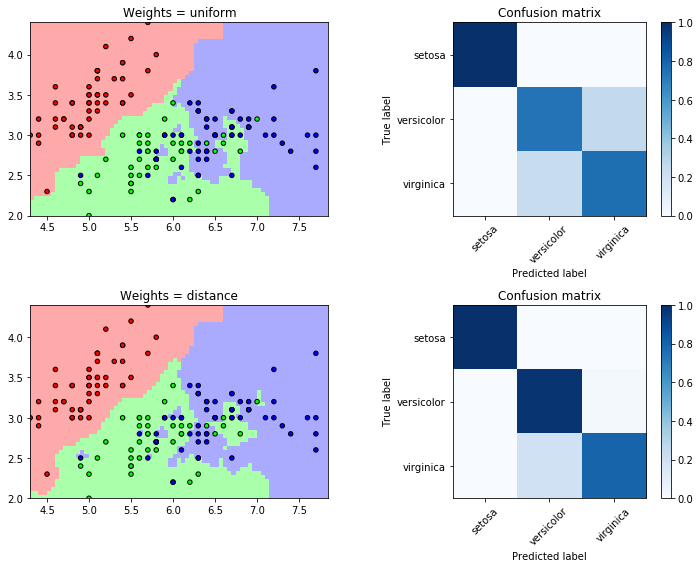

In [49]:
n_neighbors = 5

# import some data to play with
iris = skldata.load_iris()
# b_cancer = skldata.load_breast_cancer()

X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names

# X = b_cancer.data[:, 2:4]
# y = b_cancer.target
# class_names = b_cancer.target_names

h = .05 # step size in the mesh
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
for i, weights in enumerate(['uniform', 'distance']):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = sklneighb.KNeighborsClassifier(n_neighbors, weights=weights, p=1)
    clf.fit(X, y)
    plot_decision_boudary(axes[i][0], clf, X, y, h, 
                          "Weights = {}".format(weights))
    cm = sklmetrics.confusion_matrix(y, clf.predict(X))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    im = axes[i][1].imshow(cm, cmap=plt.cm.Blues)
    axes[i][1].set_title("Confusion matrix")
    axes[i][1].set_ylabel('True label')
    axes[i][1].set_xlabel('Predicted label')
    tick_marks = np.arange(len(class_names))
    axes[i][1].set_xticks(tick_marks)
    axes[i][1].set_yticks(tick_marks)
    axes[i][1].set_xticklabels(class_names, rotation=45)
    axes[i][1].set_yticklabels(class_names)
    fig.colorbar(im, ax=axes[i][1])
fig.tight_layout()

### Find optimal number of neighbors

In [85]:
import sklearn.model_selection as sklmsel

b_cancer = skldata.load_breast_cancer()
X = b_cancer.data
y = b_cancer.target
print(X.shape)
k_list = [i for i in range(1, 31)]
mean_acc_list = np.zeros(len(k_list))
std_acc_list = np.zeros(len(k_list))
for i, k in enumerate(k_list):
    clf = sklneighb.KNeighborsClassifier(n_neighbors=k, p=2, weights="distance")
    scores = sklmsel.cross_val_score(clf, X, y, cv=3)
    mean_acc_list[i] = np.mean(scores)
    std_acc_list[i] = np.std(scores)

(569, 30)


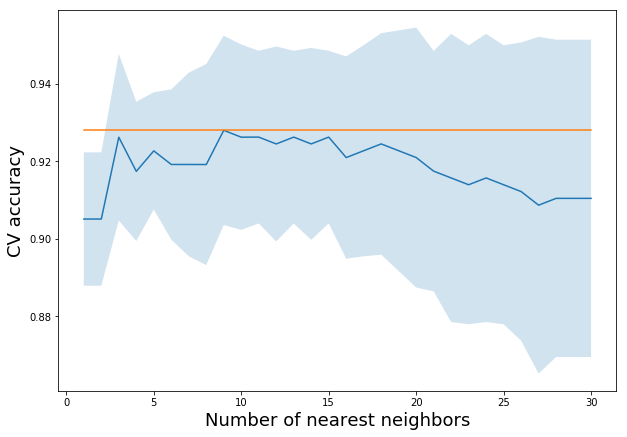

In [86]:
plt.figure(figsize=(10, 7))
plt.plot(k_list, mean_acc_list)
plt.plot(k_list, np.ones(len(k_list)) * np.max(mean_acc_list))
plt.fill_between(k_list, mean_acc_list - std_acc_list, mean_acc_list + std_acc_list, alpha=0.2)
plt.xlabel("Number of nearest neighbors", fontsize=18)
plt.ylabel("CV accuracy", fontsize=18)

## Regression

### [Example from scikit-learn](http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py)

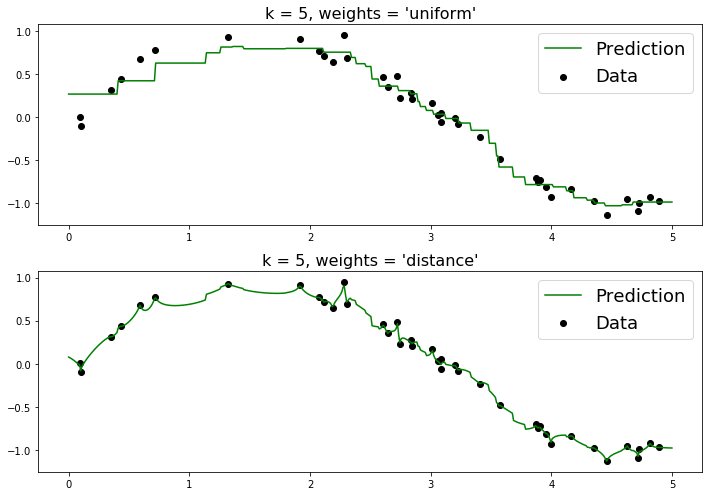

In [56]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y += 0.1 * np.random.randn(len(y))

# #############################################################################
# Fit regression model
n_neighbors = 5
plt.figure(figsize=(10,7))
for i, weights in enumerate(['uniform', 'distance']):
    knn = sklneighb.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='Data')
    plt.plot(T, y_, c='g', label='Prediction')
    plt.axis('tight')
    plt.legend(fontsize=18)
    plt.title("k = %i, weights = '%s'" % (n_neighbors, weights), fontsize=16)
plt.tight_layout()

### Find optimal number of neighbors

In [84]:
boston = skldata.load_boston()
X = boston.data
y = boston.target
print(X.shape)
k_list = [i for i in range(1, 41)]
mean_acc_list = np.zeros(len(k_list))
std_acc_list = np.zeros(len(k_list))
scoring = "neg_mean_squared_error"
# scoring = "r2"
for i, k in enumerate(k_list):
    clf = sklneighb.KNeighborsRegressor(n_neighbors=k, weights="distance", p=2)
    scores = sklmsel.cross_val_score(clf, X, y, cv=5, scoring=scoring)
    mean_acc_list[i] = np.mean(-scores)
    std_acc_list[i] = np.std(scores)

(506, 13)


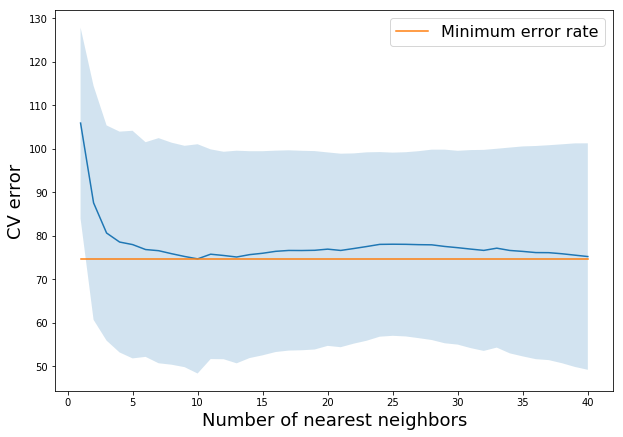

In [83]:
plt.figure(figsize=(10, 7))
plt.plot(k_list, mean_acc_list)
plt.plot(k_list, np.ones(len(k_list)) * np.min(mean_acc_list), label="Minimum error rate")
plt.fill_between(k_list, mean_acc_list - std_acc_list, mean_acc_list + std_acc_list, alpha=0.2)
plt.legend(fontsize=16)
plt.xlabel("Number of nearest neighbors", fontsize=18)
plt.ylabel("CV error", fontsize=18)

## But we have a problem...

### How compute nearest neighbors for large datasets?

- It is separate branch of science
- Donald Knuth referred to this problem as **post-office problem** in "The Art of Computer Programming", Vol. 3
- Facebook creates its own [tool](https://github.com/facebookresearch/pysparnn) to find nearest neighbor in sparse data
- More details [here](https://en.wikipedia.org/wiki/Nearest_neighbor_search) and [here](http://www.mit.edu/~andoni/thesis/main.pdf)

### Exact search

- Brute force
    - Loop over all $m$ samples in dataset and sort then according to distancec function values
    - Complexity $O(mn)$
    - It can, on average, outperform space partitioning approaches on higher dimensional spaces [1](http://www.vldb.org/conf/1998/p194.pdf)

- [kd-tree](http://cgi.di.uoa.gr/~ad/MDE515/p509-bentley.pdf)
    - Recursive splitting dimension according to single axes in data and construct tree w.r.t. distances 
    - Complexity: construction &mdash; $O(m\log(m))$, search &mdash; $O(\log(m))$
    - Issues with balancing 
    - Becomes inefficient for high-dimensional data ($n > 20$)
    - Detailed description [here](https://en.wikipedia.org/wiki/K-d_tree)
    - Visualization of search neighbors is [here](http://andrewd.ces.clemson.edu/courses/cpsc805/references/nearest_search.pdf)
    

- [Ball tree](http://www.icsi.berkeley.edu/ftp/global/pub/techreports/1989/tr-89-063.pdf)
    - Effective in high dimension
    - Similar to kd-tree in complexity
    - Split not along axis but along hypersphere

Here will be a kd-tree visualization

### Approximate search

- [Local Sensitive Hashing](https://ru.wikipedia.org/wiki/Locality-sensitive_hashing): create a hash function that will be small for close samples and large for far samples with some probability
- [Learning to Hash](https://cs.nju.edu.cn/lwj/L2H.html)

## Metric learning

- It is all about Mahalanobis metric and determing the best linear transformation of space
- Idea: make samples from the same class closer and from the different classes - further
- Problem statement
$$
\begin{align*}
& \min_{M \succ 0} \sum_{(x_i, x_j) \in \mathcal{S}} d^2_M(x_i, x_j)\\
\text{s.t. } & \sum_{(x_i, x_j) \in \mathcal{D}} d^2_M (x_i, x_j) \geq 1
\end{align*}
$$

### Large margin nearest neighbor (LMNN)

- Idea: after linear transformation, every sample has to have neighbors in neighborhood
- <img src=https://www.researchgate.net/profile/Edoardo_Pasolli/publication/282004969/figure/fig1/AS:291981265387520@1446625166553/Fig-2-Schematic-representation-of-the-LMNN-metric-learning-method-a-Original-feature.png>

- Problem statement
$$
\begin{align*}
& \min_{\mathbf{M}} \sum_{i,j\in N_i} d(\vec x_i,\vec x_j) + \sum_{i,j,l} \xi_{ijl} \\
& \forall {i,j \in N_i,l, y_l\neq y_i} \\
& d(\vec x_i,\vec x_j)+1\leq d(\vec x_i,\vec x_l)+\xi_{ijl} \\
& \xi_{ijl}\geq 0 \\
& \mathbf{M}\succeq 0
\end{align*}
$$
- Although here we have SDP, effective methods exist

### Other methods and experiments for the next lecture

- Sparse Determinant Metric Learning (SDML)
- Least Squares Metric Learning (LSML)
- Neighborhood Components Analysis (NCA)

## Summary

- k-Nearest Neighbors
- Methods to compute nearest neighbors
- Metric learning